<a href="https://colab.research.google.com/github/purpletangerine/covid19/blob/master/covid19Papers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ted Talks Topic Modeling - https://www.kaggle.com/beatricecai/nlp-text-summarization-topic-modeling

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
transcripts_df = pd.read_csv('gdrive/My Drive/CovidPapers.csv', encoding='ISO 8859-1')

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words="english",
                        use_idf=True,
                        ngram_range=(1,3), # considering only 1-grams
                        min_df = 0.05,     # cut words present in less than 5% of documents
                        max_df = 0.9)      # cut words present in more than 30% of documents 
t0 = time()

tfidf = vectorizer.fit_transform(transcripts_df['corpus'])

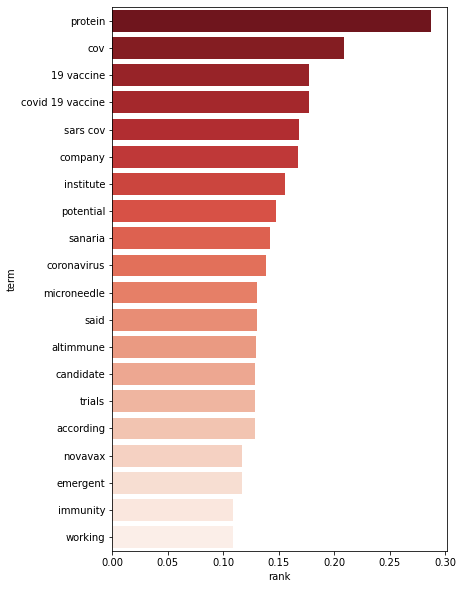

In [0]:
def rank_words(terms, feature_matrix):
    sums = feature_matrix.sum(axis=0)
    data = []
    for col, term in enumerate(terms):
        data.append( (term, sums[0,col]) )
    ranked = pd.DataFrame(data, columns=['term','rank']).sort_values('rank', ascending=False)
    return ranked

ranked = rank_words(terms=vectorizer.get_feature_names(), feature_matrix=tfidf)

fig, ax = plt.subplots(figsize=(6,10), ncols=1, nrows=1)
sns.barplot(x='rank',y='term',data=ranked[:20], palette='Reds_r', ax=ax);

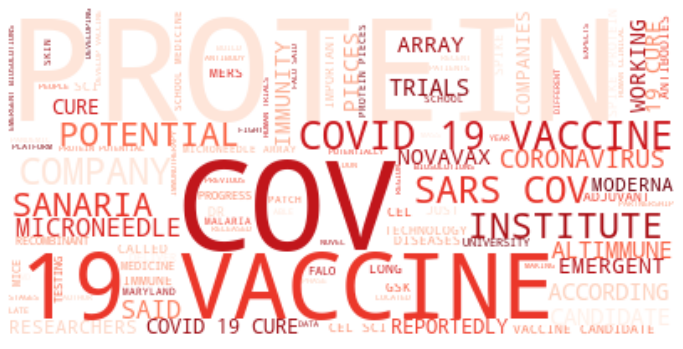

In [0]:
dic = {ranked.loc[i,'term'].upper(): ranked.loc[i,'rank'] for i in range(0,len(ranked))}

from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white',
                      max_words=100,
                      colormap='Reds').generate_from_frequencies(dic)
fig = plt.figure(1,figsize=(12,15))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

**Part 2: Topic Modeling**

In [0]:
from sklearn.decomposition import LatentDirichletAllocation

n_topics = 10
lda = LatentDirichletAllocation(n_components=n_topics,random_state=0)

topics = lda.fit_transform(tfidf)
top_n_words = 5
t_words, word_strengths = {}, {}
for t_id, t in enumerate(lda.components_):
    t_words[t_id] = [vectorizer.get_feature_names()[i] for i in t.argsort()[:-top_n_words - 1:-1]]
    word_strengths[t_id] = t[t.argsort()[:-top_n_words - 1:-1]]
t_words

{0: ['human clinical', 'previous', 'different', 'mass', 'applying'],
 1: ['cov', 'protein', 'sars cov', 'said', 'microneedle'],
 2: ['19 vaccine', 'covid 19 vaccine', 'sanaria', 'altimmune', 'company'],
 3: ['human clinical', 'previous', 'different', 'mass', 'applying'],
 4: ['human clinical', 'previous', 'different', 'mass', 'applying'],
 5: ['institute', '19 cure', 'cure', 'covid 19 cure', 'reportedly'],
 6: ['human clinical', 'previous', 'different', 'mass', 'applying'],
 7: ['human clinical', 'previous', 'different', 'mass', 'applying'],
 8: ['human clinical', 'previous', 'different', 'mass', 'applying'],
 9: ['human clinical', 'previous', 'different', 'mass', 'applying']}

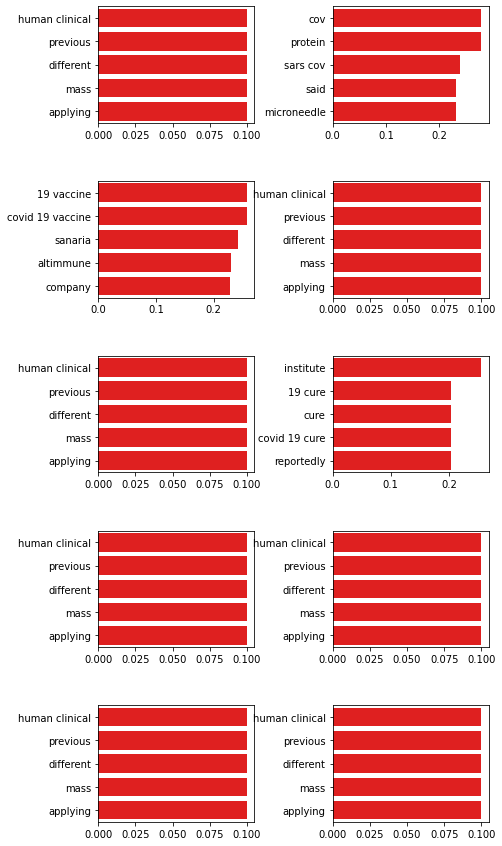

In [0]:
fig, ax = plt.subplots(figsize=(7,15), ncols=2, nrows=5)
plt.subplots_adjust(
    wspace  =  0.5,
    hspace  =  0.5
)
c=0
for row in range(0,5):
    for col in range(0,2):
        sns.barplot(x=word_strengths[c], y=t_words[c], color="red", ax=ax[row][col])
        c+=1
plt.show()

In [0]:
from sklearn.decomposition import NMF

n_topics = 10
nmf = NMF(n_components=n_topics,random_state=0)

topics = nmf.fit_transform(tfidf)
top_n_words = 5
t_words, word_strengths = {}, {}
for t_id, t in enumerate(nmf.components_):
    t_words[t_id] = [vectorizer.get_feature_names()[i] for i in t.argsort()[:-top_n_words - 1:-1]]
    word_strengths[t_id] = t[t.argsort()[:-top_n_words - 1:-1]]
t_words

{0: ['covid 19 vaccine', '19 vaccine', 'sanaria', 'protein', 'altimmune'],
 1: ['protein', 'cov', 'sars cov', 'said', 'microneedle'],
 2: ['nasovax', 'sanaria', 'altimmune', 'novel coronavirus', 'combat'],
 3: ['contenders multiple',
  'microneedle',
  'ebiomedicine researchers',
  'specific',
  'processes suggest'],
 4: ['institute', 'cure', 'reportedly', '19 cure', 'covid 19 cure'],
 5: ['institute', 'covid 19 cure', '19 cure', 'reportedly', 'cure'],
 6: ['importantly sars',
  'like band',
  'inovio therapeteutics',
  'stacked multiply',
  'processes suggest'],
 7: ['potential', 'company', 'novavax', 'emergent', '19 vaccine'],
 8: ['landscape',
  'antibodies neutralize',
  'previous experience sars',
  'following',
  'process recently'],
 9: ['stages',
  'stimulate durable broad',
  'share',
  'prove',
  'feel responsibility fight']}

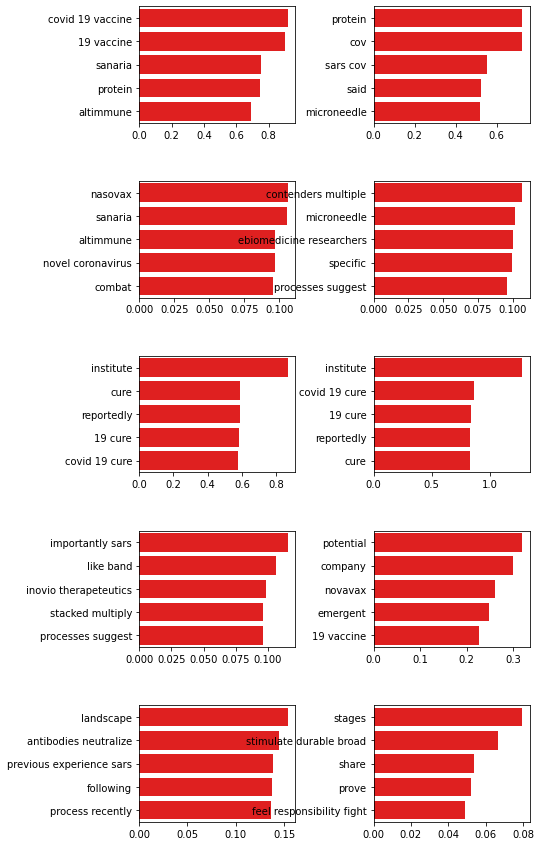

In [0]:
fig, ax = plt.subplots(figsize=(7,15), ncols=2, nrows=5)
plt.subplots_adjust(
    wspace  =  0.5,
    hspace  =  0.5
)
c=0
for row in range(0,5):
    for col in range(0,2):
        sns.barplot(x=word_strengths[c], y=t_words[c], color="red", ax=ax[row][col])
        c+=1
plt.show()

In [0]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('tfidf', vectorizer),
    ('nmf', nmf)
])

document_id = 1
t = pipe.transform([transcripts_df['corpus'].iloc[document_id]]) 
print('Topic distribution for document #{}: \n'.format(document_id),t)
print('Relevant topics for document #{}: \n'.format(document_id),np.where(t>0.01)[1])
print('\nTranscript:\n',transcripts_df['corpus'].iloc[document_id][:500],'...')

Topic distribution for document #1: 
 [[3.37798273e-06 2.38635018e-01 0.00000000e+00 6.77614073e-03
  0.00000000e+00 0.00000000e+00 1.02396471e-01 0.00000000e+00
  5.58694984e-02 0.00000000e+00]]
Relevant topics for document #1: 
 [1 6 8]

Transcript:
 The COVID-19 vaccine landscape has three to four dozen contenders. Multiple companies such as Moderna Therapeutics, Inovio Therapeteutics, Janssen, and Sanofi Pasteur are working on their own hopeful candidates. Academic groups are also pushing forward with firm footing. Indeed, one example comes from an announcement today from scientists at the University of Pittsburgh School of Medicine that their vaccine candidate produces antibodies specific to SARS-CoV-2 in mice, at quantities thought to be ...


In [0]:
t = pipe.transform(transcripts_df['corpus']) 
t = pd.DataFrame(t, columns=[str(t_words[i]) for i in range(0,10)])
t.head()

,"['covid 19 vaccine', '19 vaccine', 'sanaria', 'protein', 'altimmune']","['protein', 'cov', 'sars cov', 'said', 'microneedle']","['nasovax', 'sanaria', 'altimmune', 'novel coronavirus', 'combat']","['contenders multiple', 'microneedle', 'ebiomedicine researchers', 'specific', 'processes suggest']","['institute', 'cure', 'reportedly', '19 cure', 'covid 19 cure']","['institute', 'covid 19 cure', '19 cure', 'reportedly', 'cure']","['importantly sars', 'like band', 'inovio therapeteutics', 'stacked multiply', 'processes suggest']","['potential', 'company', 'novavax', 'emergent', '19 vaccine']","['landscape', 'antibodies neutralize', 'previous experience sars', 'following', 'process recently']","['stages', 'stimulate durable broad', 'share', 'prove', 'feel responsibility fight']"
0,0.144964,0.000000,0.126773,0.000000,6.733880e-11,0.000000,0.00000,0.090984,0.000000,0.109435
1,0.000009,0.238557,0.000000,0.007034,0.000000e+00,0.000000,0.10245,0.000000,0.055776,0.000000
2,0.000000,0.000083,0.000000,0.000000,1.271049e-01,0.035392,0.00000,0.000000,0.000000,0.000000


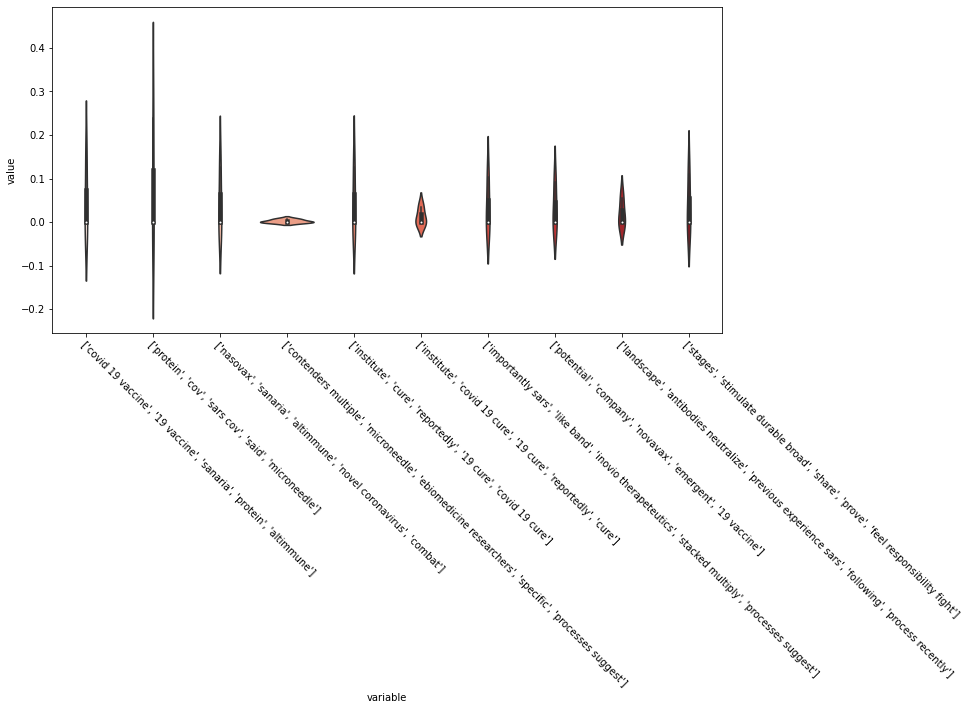

In [0]:
new_t = t.melt()


fig, ax = plt.subplots(figsize=(12,6), ncols=1, nrows=1)
sns.violinplot(x="variable", y="value", data=new_t, palette='Reds', ax=ax)

plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor") 

plt.show()